In [1]:
using DataFrames
using SolverBenchmark
using SolverTools
using JLD2

In [2]:
res_path = "C:\\Users\\Geoffroy Leconte\\Documents\\cours\\TFE\\code\\results\\mehrotra"
gurobi_path = "C:\\Users\\Geoffroy Leconte\\Documents\\cours\\TFE\\code\\results\\gurobi"

"C:\\Users\\Geoffroy Leconte\\Documents\\cours\\TFE\\code\\results\\gurobi"

In [9]:
file_gurobi = jldopen(string(gurobi_path, "\\gurobiQP_barrier_allOFF.jld2"), "r")
gurobi = file_gurobi["stats"]
close(file_gurobi)
file_gurobi2 = jldopen(string(gurobi_path, "\\gurobiQP_barrier_scalingON.jld2"), "r")
gurobi2 = file_gurobi2["stats"]
close(file_gurobi2)
file_gurobi3 = jldopen(string(gurobi_path, "\\gurobiQP_barrier_presolveON.jld2"), "r")
gurobi3 = file_gurobi3["stats"]
close(file_gurobi3)
file_gurobi4 = jldopen(string(gurobi_path, "\\gurobiQP_barrier_presolvescalingON.jld2"), "r")
gurobi4 = file_gurobi4["stats"]
close(file_gurobi4)
file_gurobi5 = jldopen(string(gurobi_path, "\\gurobiQP_barrier_allON.jld2"), "r")
gurobi5 = file_gurobi5["stats"]
close(file_gurobi5)

file1 = jldopen(string(res_path, "\\mehrotra_ldl_QP1.jld2"), "r") # same params as mehrotra16
mehrotra1 = file1["stats"];
close(file1)
# same with ϵ_scaling=1-6 (previously 1e-3)
file2 = jldopen(string(res_path, "\\mehrotra_ldl_QP2.jld2"), "r") 
mehrotra2 = file2["stats"];
close(file2)
file3 = jldopen(string(res_path, "\\mehrotra_ldl_QP3.jld2"), "r") # same without scaling 
mehrotra3 = file3["stats"];
close(file3)
file4 = jldopen(string(res_path, "\\mehrotra_ldl_QP4.jld2"), "r") # scaling (1e-4) with d3 (Q)
mehrotra4 = file4["stats"];
close(file4)
file5 = jldopen(string(res_path, "\\mehrotra_ldl_QP5.jld2"), "r") # scaling ruiz2 D1AD2, D2QD2
mehrotra5 = file5["stats"];
close(file5)
file6 = jldopen(string(res_path, "\\mehrotra_ldl_QP6.jld2"), "r") # try/catch δ*=1e3, ρ*=1e5, no check frontier
mehrotra6 = file6["stats"];
close(file6)

In [15]:
withenv("COLUMNS" => 600, "LINES" => 200) do
    display(mehrotra6)
end

,id,name,nvar,ncon,nequ,status,objective,elapsed_time,iter,dual_feas,primal_feas,neval_obj,neval_grad,neval_cons,neval_jcon,neval_jgrad,neval_jac,neval_jprod,neval_jtprod,neval_hess,neval_hprod,neval_jhprod,neval_residual,neval_jac_residual,neval_jprod_residual,neval_jtprod_residual,neval_hess_residual,neval_jhess_residual,neval_hprod_residual,extrainfo
,Int64,String,Int64,Int64,Int64,Symbol,Float64,Float64,Int64,Float64,Float64,Int64,Int64,Int64,Int64,Int64,Int64,Int64,Int64,Int64,Int64,Int64,Int64,Int64,Int64,Int64,Int64,Int64,Int64,String
1,1,AUG2D,20200,10000,0,acceptable,1.68741e6,0.260634,6,1.35003e-13,1.47924e-11,1,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,
2,2,AUG2DC,20200,10000,0,acceptable,1.81837e6,0.240834,6,1.45661e-13,1.7832e-11,1,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,
3,3,AUG2DCQP,20200,10000,0,acceptable,6.49813e6,0.473307,17,2.82738e-9,2.13163e-14,1,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,
4,4,AUG2DQP,20200,10000,0,acceptable,6.23701e6,0.388262,15,1.36424e-12,7.10543e-14,1,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,
5,5,AUG3D,3873,1000,0,acceptable,554.068,0.0226018,3,1.78362e-10,4.71425e-9,1,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,
6,6,AUG3DC,3873,1000,0,acceptable,771.262,0.0268769,4,9.69225e-14,2.94254e-12,1,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,
7,7,AUG3DCQP,3873,1000,0,acceptable,993.362,0.0660369,12,3.79784e-8,2.66454e-15,1,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,
8,8,AUG3DQP,3873,1000,0,acceptable,675.238,0.0521479,11,8.88178e-16,4.88498e-15,1,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,
9,9,BOYD1,93261,18,0,acceptable,-6.17352e7,1.86301,21,6.45131e-6,0.0268555,1,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,


In [11]:
withenv("COLUMNS" => 600, "LINES" => 200) do
    display(gurobi2)
end

,id,name,nvar,ncon,nequ,status,objective,elapsed_time,iter,dual_feas,primal_feas,neval_obj,neval_grad,neval_cons,neval_jcon,neval_jgrad,neval_jac,neval_jprod,neval_jtprod,neval_hess,neval_hprod,neval_jhprod,neval_residual,neval_jac_residual,neval_jprod_residual,neval_jtprod_residual,neval_hess_residual,neval_jhess_residual,neval_hprod_residual,extrainfo
,Int64,String,Int64,Int64,Int64,Symbol,Float64,Float64,Int64,Float64,Float64,Int64,Int64,Int64,Int64,Int64,Int64,Int64,Int64,Int64,Int64,Int64,Int64,Int64,Int64,Int64,Int64,Int64,Int64,String
1,1,AUG2D,20200,10000,0,acceptable,1.67751e6,0.0667331,2,1.84344e-9,1.91884e-13,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,
2,2,AUG2DC,20200,10000,0,acceptable,1.80827e6,0.0618401,2,1.91211e-9,1.95798e-13,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,
3,3,AUG2DCQP,20200,10000,0,acceptable,6.48803e6,0.304611,17,1.62726e-11,3.90035e-13,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,
4,4,AUG2DQP,20200,10000,0,acceptable,6.22711e6,0.330621,19,1.54698e-11,4.07204e-13,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,
5,5,AUG3D,3873,1000,0,acceptable,-782.432,0.014899,2,7.28437e-11,1.28805e-14,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,
6,6,AUG3DC,3873,1000,0,acceptable,-1165.24,0.014626,2,6.33568e-11,1.05337e-14,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,
7,7,AUG3DCQP,3873,1000,0,acceptable,-943.138,0.069597,17,1.55871e-14,1.21411e-14,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,
8,8,AUG3DQP,3873,1000,0,acceptable,-661.262,0.072257,18,1.46945e-14,1.51914e-14,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,
9,9,BOYD1,93261,18,0,exception,Inf,Inf,0,Inf,Inf,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,OutOfMemoryError()


In [12]:
stats = Dict(:gurobi => gurobi, :gurobi2 => gurobi2,
            :mehrotra6 => mehrotra6,  :mehrotra3 => mehrotra3,
            :mehrotra4 => mehrotra4, :mehrotra5 => mehrotra5)

 stats2 = Dict(:mehrotra1 => mehrotra1,
                :mehrotra4 => mehrotra4, :mehrotra5 => mehrotra5, :mehrotra6 => mehrotra6)

Dict{Symbol,DataFrame} with 4 entries:
  :mehrotra1 => 123×30 DataFrame. Omitted printing of 23 columns…
  :mehrotra4 => 123×30 DataFrame. Omitted printing of 23 columns…
  :mehrotra6 => 123×30 DataFrame. Omitted printing of 23 columns…
  :mehrotra5 => 123×30 DataFrame. Omitted printing of 23 columns…

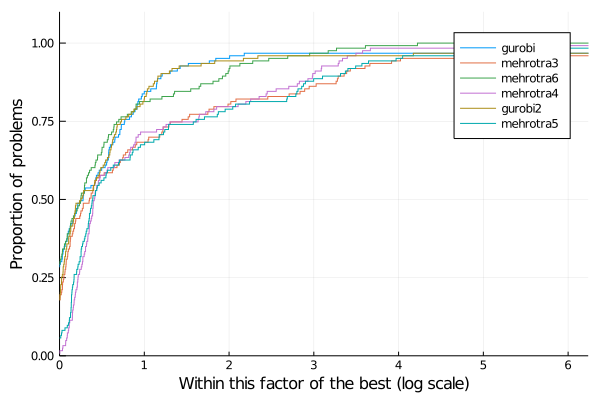

In [13]:
performance_profile(stats, df->df.elapsed_time)


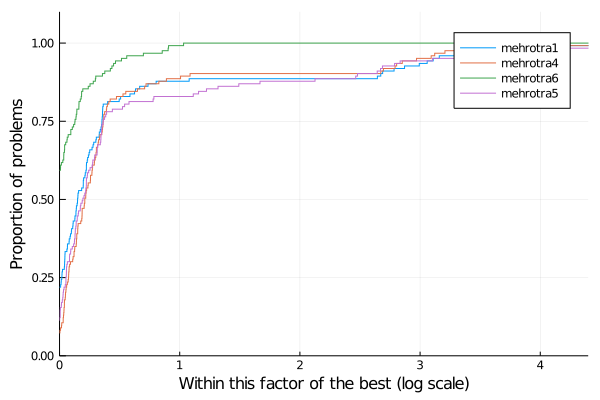

In [14]:
performance_profile(stats2, df->df.elapsed_time)